In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


In [2]:
def start_plot():
    fig, ax = plt.subplots()
    ax.set_xlabel("Czas trwania testu [h]")

    return (fig, ax)

In [3]:
def load_locust(filename):
    df =  pd.read_csv(filename)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
    start = df['Timestamp'][0]
    df['Timestamp'] = df['Timestamp'].apply(lambda dt: dt - start)
    df.set_index('Timestamp', inplace=True, drop=False)
    return df

serverless = load_locust('../load-tests/results/serverless_v4_stats_history.csv')
ec2 = load_locust('../load-tests/results/ec2_v2_stats_history.csv')


ec2

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.9%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
Timestamp,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0 days 00:00:00,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.000000,0,0,0.000000e+00
0 days 00:00:01,0 days 00:00:01,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.000000,0,0,0.000000e+00
0 days 00:00:02,0 days 00:00:02,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.000000,0,0,0.000000e+00
0 days 00:00:03,0 days 00:00:03,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.000000,0,0,0.000000e+00
0 days 00:00:04,0 days 00:00:04,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0.000000,0,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 07:59:55,0 days 07:59:55,0,POST,/photos,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,23,0,59,104.782609,18,1045,1.591304e+02
0 days 07:59:55,0 days 07:59:55,0,GET,/photos/{all},0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4821,0,34,49.727235,15,2128,6.412277e+03
0 days 07:59:55,0 days 07:59:55,0,GET,/photos?modelSlug=,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1168,0,20,25.726027,14,778,1.731024e+03


In [4]:
selected_metric = 'Total Median Response Time'
selected_metric_desc = 'Mediana czasu odpowiedzi [ms]'

<AxesSubplot: xlabel='Czas od rozpoczęcia [h]', ylabel='Liczba użytkowników'>

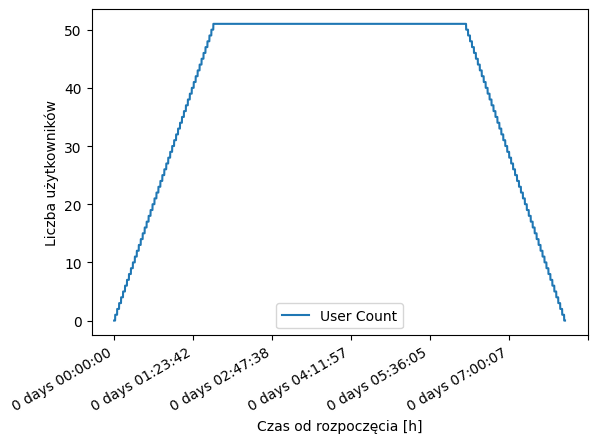

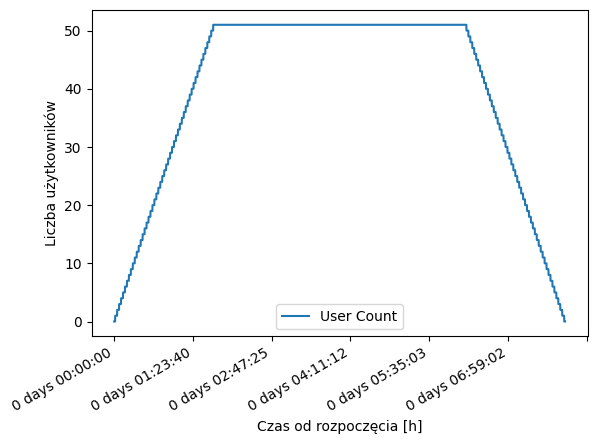

In [5]:
serverless[serverless.Name == 'Aggregated'].plot(x = 'Timestamp', y = 'User Count', xlabel='Czas od rozpoczęcia [h]', ylabel='Liczba użytkowników')
ec2[ec2.Name == 'Aggregated'].plot(x = 'Timestamp', y = 'User Count', xlabel='Czas od rozpoczęcia [h]', ylabel='Liczba użytkowników')

Text(0, 0.5, 'Liczba aktywnych użytkowników')

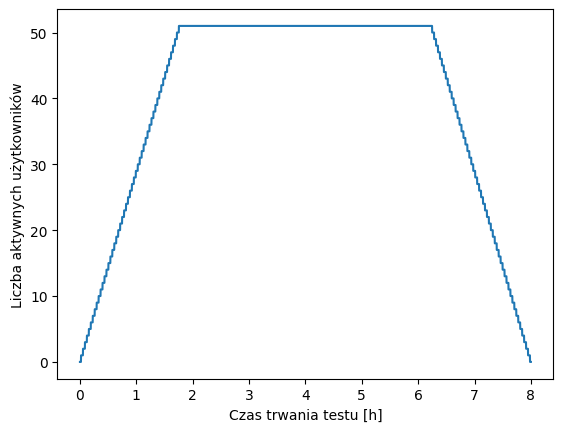

In [6]:
fig, ax = start_plot()

df = serverless[serverless.Name == 'Aggregated']
ax.plot(df['Timestamp'].dt.seconds / 60 / 60, df['User Count'])
ax.set_ylabel('Liczba aktywnych użytkowników')



In [7]:
def plot_metric(ax, df, allowlist, y, prefix=None, title=None, suffix=True, type='median', period='5T', **kwargs):
    if type == 'median':
        df = df.groupby('Name').resample(period).median(numeric_only=True)
    elif type == 'p99':
        df = df.groupby('Name').resample(period).quantile(q=0.99, numeric_only=True)
    elif type == 'sum':
        df = df.groupby('Name').resample(period).sum(numeric_only=True)
    else:
        raise Exception("unkown type")
    if title is not None:
        ax.set_title(title)
    for name in df.index.get_level_values('Name').unique():
        if name in allowlist:
            new_df = df[df.index.get_level_values('Name') == name]
            if prefix is not None:
                label = f"{prefix}"
                if suffix:
                    label = f"{label} - {name}"
            else:
                label = name
            ax.plot(new_df.index.get_level_values('Timestamp').seconds / 60 / 60, new_df[y], label=label, **kwargs)



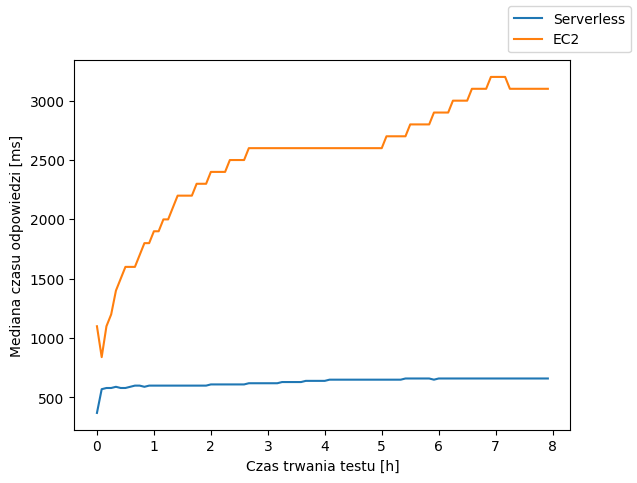

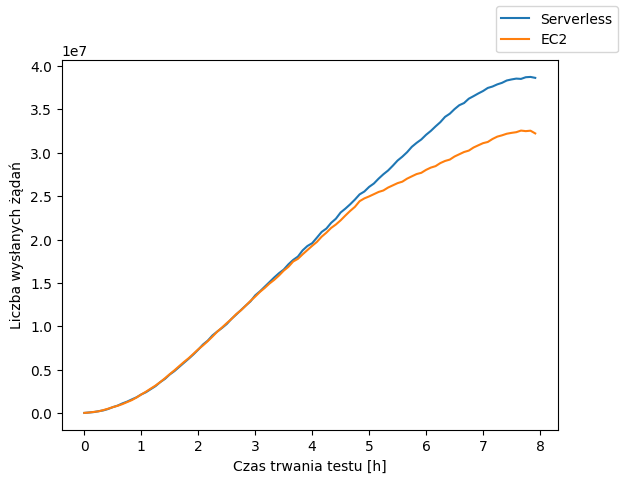

In [8]:
ops = ['Aggregated']
fig, ax = start_plot()
plot_metric(ax, serverless, ops, selected_metric, prefix='Serverless', suffix=False)
plot_metric(ax, ec2, ops, selected_metric, prefix='EC2', suffix=False)
ax.set_ylabel(selected_metric_desc)
fig.legend()

ops = ['Aggregated']
fig, ax = start_plot()
plot_metric(ax, serverless, ops, 'Total Request Count', prefix='Serverless', suffix=False, type='sum')
plot_metric(ax, ec2, ops, 'Total Request Count', prefix='EC2', suffix=False, type='sum')
ax.set_ylabel('Liczba wysłanych żądań')
fig.legend()

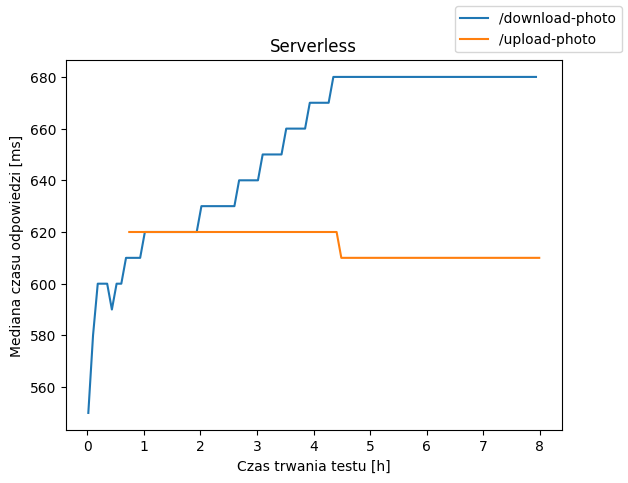

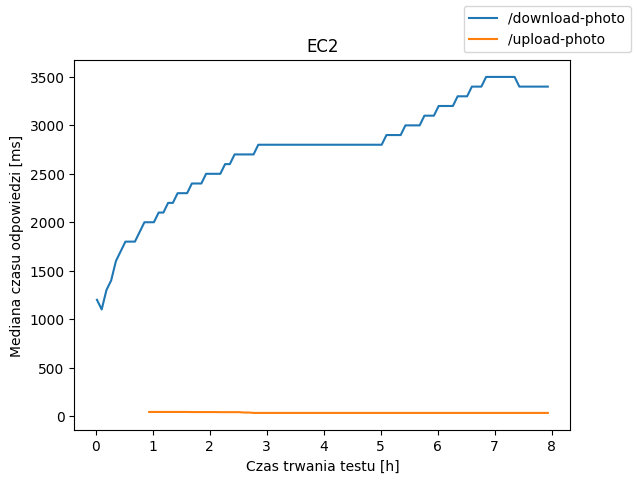

In [9]:
ops = ['/download-photo', '/upload-photo']
fig, ax = start_plot()
plot_metric(ax, serverless, ops, selected_metric, title='Serverless')
ax.set_ylabel(selected_metric_desc)
fig.legend()

fig, ax = start_plot()
plot_metric(ax, ec2, ops,  selected_metric, title='EC2')
ax.set_ylabel(selected_metric_desc)
fig.legend()

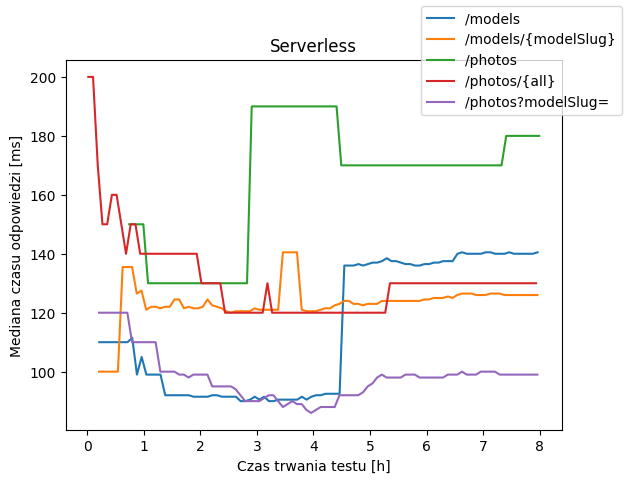

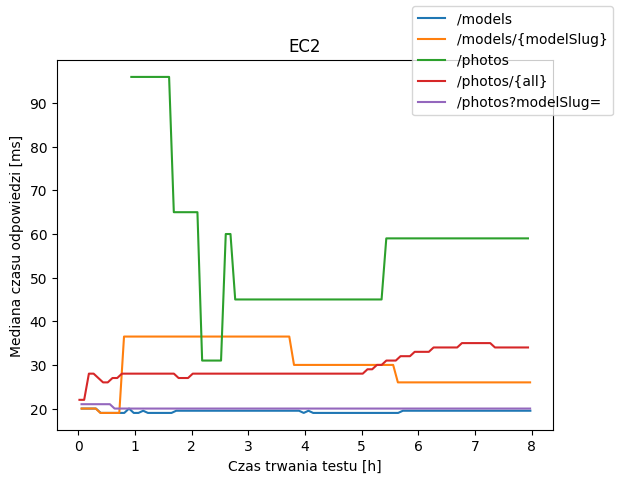

In [10]:
ops = ['/photos/{all}', '/photos', '/photos?modelSlug=', '/models/{modelSlug}', '/models']
fig, ax = start_plot()
plot_metric(ax, serverless, ops, selected_metric, title='Serverless')
ax.set_ylabel(selected_metric_desc)
fig.legend()

fig, ax = start_plot()
plot_metric(ax, ec2, ops, selected_metric, title='EC2')
ax.set_ylabel(selected_metric_desc)
fig.legend()
